In [3]:
import numpy as np

In [37]:
data = np.load("./metr_adj_matrix.npz")['arr_0']

In [15]:
laplacian = np.eye(len(data)) - data

In [16]:
from scipy.sparse.linalg.eigen.arpack import eigsh

In [41]:
largest_eigval, _ = eigsh(adj1, 1, which="LM")

In [42]:
largest_eigval

array([1.2847886], dtype=float32)

In [21]:
import matplotlib.pyplot as plt

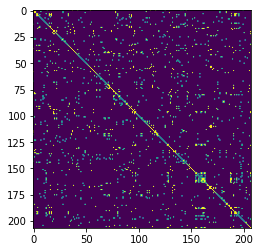

In [28]:
plt.imshow(data)

In [29]:
data

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [30]:
def calculate_random_walk_matrix(adj_mx):
    d = np.array(adj_mx.sum(1))
    d_inv = np.power(d, -0.5).flatten()
    d_inv[np.isinf(d_inv)] = 0.0
    d_mat_inv = np.diag(d_inv)

    return adj_mx.dot(d_mat_inv).T.dot(d_mat_inv)

In [31]:
def dcrnn(adj_mx):
    d = np.array(adj_mx.sum(1))
    d_inv = np.power(d, -1).flatten()
    d_inv[np.isinf(d_inv)] = 0.0
    d_mat_inv = np.diag(d_inv)

    return d_mat_inv.dot(adj_mx)

In [38]:
adj1 = calculate_random_walk_matrix(data)
adj2 = dcrnn(data)